# **CosmiCode-Internship Week-2**

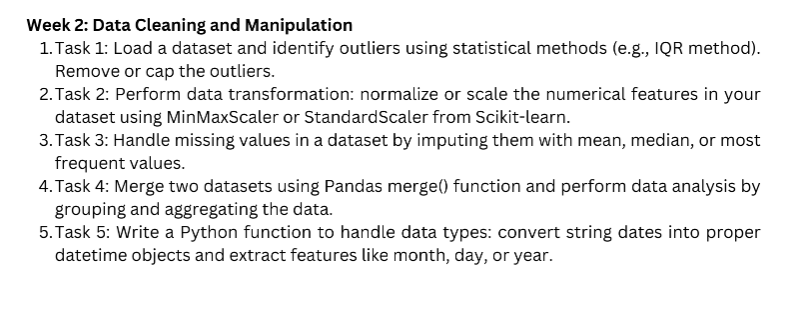

## Outliers
- These are basically data points that differ drastically from the observed data, basically values that are much higher or lower from the majority.
- Outliers can skew statistical results, cause models to perform poorly, or lead to inaccurate predictions if they are not handled properly.
- Outliers can negatively impact machine learning models, especially models like linear regression that rely on minimizing error. If there's a huge outlier, the model may "chase" that value, impacting the accuracy for the majority of your data.
- Better Predictions: Removing or transforming outliers helps the model learn the general pattern of data instead of trying to fit extreme cases.
## IQR Method
- The Interquartile Range (IQR) is a measure of statistical dispersion, which essentially tells us where the bulk of the data lies.
- IQR is calculated as:
- Q1 (First Quartile): The value below which 25% of the data lies.
- Q3 (Third Quartile): The value below which 75% of the data lies.
- IQR = Q3 - Q1
- Using the IQR, we define an outlier as:
- A data point that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
## What to do with outliers once found?
- Removing Outliers: This is a common approach where you simply drop the rows with outliers.
- Capping Outliers: Instead of removing them, you can cap them to a specific value, which reduces their effect.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Datasets/House Price Prediction/Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
for col in df.columns:
    print(f"{col} : {df[col].dtype} ")

price : int64 
area : int64 
bedrooms : int64 
bathrooms : int64 
stories : int64 
mainroad : object 
guestroom : object 
basement : object 
hotwaterheating : object 
airconditioning : object 
parking : int64 
prefarea : object 
furnishingstatus : object 


In [4]:
len(df)

545

In [5]:
# we are making a new df that contains only the numerical columns of the df basically
numerical_df = df.select_dtypes(include=['number'])

# caclulating quartiles
Q1 = numerical_df.quantile(0.25) # the values below which 25% of the data lies (its a series since it will have that value for each column)
Q3 = numerical_df.quantile(0.75) # the values above which 75% of the data lies 
IQR = Q3 - Q1   
# IQR = Q3 - Q1: This calculates the Interquartile Range (IQR) for each column. The IQR represents the spread of the middle 50% of the data, which is used to identify outliers.


# Filtering out outliers
df_no_outliers = df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]   # the any(axis=1) is used to specify that we are checking across columns in each row, so if any column in a row has an outlier value, the entire row is marked as the outlier
# for example:
            # Row 1: [False, True, False]  -> .any(axis=1) returns True (since one value is True)
            # Row 2: [False, False, False] -> .any(axis=1) returns False (since all values are False)

# the ~ is used to invert the condition, its the bitwise NOT operator, python does have a normal not operator too, its literally just written as not, but that is not used with data frames or series, it causes an error if you use that, so we gotta use the bitwise NOT operator, as in the ~


print(len(df_no_outliers))
df_no_outliers


463


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


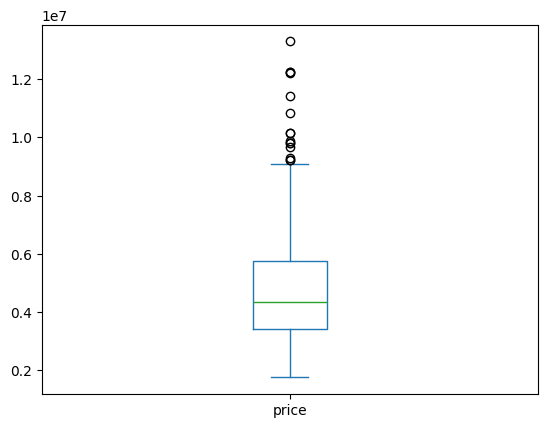

In [6]:
import matplotlib.pyplot as plt
df['price'].plot(kind='box')
plt.show()


## Task-2: Normalization using MinMaxScaler 



## Transformation:
- Data transformation is the process of converting data into a format or structure that makes it more suitable for analysis or modeling. In machine learning, raw data may have different scales, units, distributions, or even be messy and inconsistent. Data transformation helps in making the data ready for the machine learning model to process effectively.
- Most machine learning algorithms work best when the input data is within certain ranges and uniform in distribution.
- For example, if one feature has values ranging from 0 to 1 while another has values ranging from 1,000 to 10,000, the algorithm may give undue importance to the feature with larger values simply because of its scale, rather than its importance in predicting the target.
- Normalization generally refers to rescaling the data so that the values fall between 0 and 1 or sometimes -1 and 1. This is particularly useful for data that does not follow a Gaussian distribution.
- Scaling, on the other hand, refers to transforming data to standardize its range or adjust its mean and standard deviation to a specific scale, typically zero mean and unit variance.
### 1. **MinMaxScaler (Normalization)**
- The MinMaxScaler is used to rescale the data within a specific range, typically 0 to 1.
- 
- Each feature value is rescaled based on the minimum and maximum values of that feature.
- 
- **Formula:**
- 𝑋′= 𝑋−𝑋min / 𝑋max−𝑋min

- X: Original value
- X_min: Minimum value of the feature
- X_max: Maximum value of the feature

- **When to Use:**
- When you know your data is not normally distributed.
- When you have a requirement that all values must lie in a specific range (e.g., neural network activation functions like Sigmoid).


### 2. **StandardScaler (Standardization)**
- The StandardScaler is used to standardize features by removing the mean and scaling to unit variance.

- Each feature will have mean = 0 and standard deviation = 1 after scaling.

- **Formula:**

- 𝑋′= 𝑋−𝜇 / 𝜎
- X: Original value
- \mu: Mean of the feature
- \sigma: Standard deviation of the feature

- **When to Use:**

- When you know that your data follows a Gaussian distribution (bell-shaped curve).
- It is especially useful when your model assumes normally distributed data (like linear regression, k-nearest neighbors, etc.).

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
df = df_no_outliers.copy()
numerical_features = df.select_dtypes(include=['number'])


min_max_scaler = MinMaxScaler()

# Apply MinMaxScaler to numerical features
scaled_minmax = min_max_scaler.fit_transform(numerical_features)

# Convert the scaled array back to a DataFrame for easier understanding
df_minmax_scaled = pd.DataFrame(scaled_minmax, columns=numerical_features.columns)

print("MinMaxScaler Output:")
print(df_minmax_scaled.head())



# MinMaxScaler is sensitive to outliers. If there are outliers in your dataset, they will stretch the range, making the rest of the values very small.


MinMaxScaler Output:
      price      area  bedrooms  bathrooms  stories  parking
0  1.000000  0.491525  1.000000        0.0      0.5      1.0
1  1.000000  0.559322  1.000000        0.5      0.5      0.5
2  0.971429  0.333333  0.666667        0.5      0.5      1.0
3  0.966667  0.538983  0.666667        0.5      0.5      0.5
4  0.952381  0.301695  0.666667        0.0      0.5      1.0


In [9]:
standard_scaler = StandardScaler()

# Apply StandardScaler to numerical features
scaled_standard = standard_scaler.fit_transform(numerical_features)

# Convert the scaled array back to a DataFrame for easier understanding
df_standard_scaled = pd.DataFrame(scaled_standard, columns=numerical_features.columns)

print("StandardScaler Output:")
print(df_standard_scaled.head())

# If the data is not normally distributed, the transformation might not be meaningful, and might even distort the data.


StandardScaler Output:
      price      area  bedrooms  bathrooms   stories   parking
0  3.229302  0.687763  1.735836  -0.500988  0.613917  1.822229
1  3.229302  1.022328  1.735836   1.773105  0.613917  0.532180
2  3.085816 -0.092888  0.216569   1.773105  0.613917  1.822229
3  3.061901  0.921958  0.216569   1.773105  0.613917  0.532180
4  2.990158 -0.249018  0.216569  -0.500988  0.613917  1.822229


- If you are working with a model that assumes Gaussian distribution (e.g., linear models), or if your data is already normally distributed, StandardScaler works best.
- If you want your values to be in a fixed range, especially for models that are sensitive to input range (e.g., neural networks with activation functions like Sigmoid or Tanh), use MinMaxScaler.

<br/>
<br/>

- Distance-Based Models (like k-Nearest Neighbors, SVM, K-means clustering): These models are very sensitive to the scale of data, as they use distance metrics. Scaling features helps ensure that one feature doesn’t dominate due to its range.
- Gradient Descent-Based Models (e.g., linear regression, logistic regression, neural networks): Scaling helps gradient descent converge faster and more efficiently.

## Task-3: Handling missing values



- Machine learning models cannot handle missing values by default, and if left unchecked, they may lead to errors or degraded model performance.
- Missing data can bias the results or cause models to fail in training or prediction.

In [10]:
# Count missing values per column
print("Missing Values in Each Column:")
print(df.isna().sum())  # we got no missing values so no point doing this


Missing Values in Each Column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [11]:
# we got no missing values but still, for the sake of practice, lets go over how to impute missing values
# Importing SimpleImputer from sklearn to handle missing values
from sklearn.impute import SimpleImputer

# Impute numerical features with median value
numerical_features = df.select_dtypes(include=['number'])
median_imputer = SimpleImputer(strategy='median')
numerical_features_imputed = pd.DataFrame(median_imputer.fit_transform(numerical_features), columns=numerical_features.columns)

# Impute categorical features with the most frequent value (mode)
categorical_features = df.select_dtypes(include=['object'])
mode_imputer = SimpleImputer(strategy='most_frequent')
categorical_features_imputed = pd.DataFrame(mode_imputer.fit_transform(categorical_features), columns=categorical_features.columns)

# Combine numerical and categorical data after imputation
df_imputed = pd.concat([numerical_features_imputed, categorical_features_imputed], axis=1)

print("Data after Imputation:")

df_imputed.head()





# SimpleImputer: A class in sklearn to handle missing values with different strategies.
# strategy='median': Replaces missing numerical values with the median.
# strategy='most_frequent': Replaces missing categorical values with the most frequent value.
# fit_transform(): Fits the imputer on the given data and replaces the missing values.
# pd.concat(): Combines the imputed numerical and categorical features back into a complete dataset.

Data after Imputation:


,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,9100000.0,6000.0,4.0,1.0,2.0,2.0,yes,no,yes,no,no,no,semi-furnished
1,9100000.0,6600.0,4.0,2.0,2.0,1.0,yes,yes,yes,no,yes,yes,unfurnished
2,8890000.0,4600.0,3.0,2.0,2.0,2.0,yes,yes,no,no,yes,no,furnished
3,8855000.0,6420.0,3.0,2.0,2.0,1.0,yes,no,no,no,yes,yes,semi-furnished
4,8750000.0,4320.0,3.0,1.0,2.0,2.0,yes,no,yes,yes,no,no,semi-furnished


## Task-4: Merging datasets

- Merging datasets is a common task in data science and machine learning, used to combine data from different sources into a unified dataset. This is important for:
- Completeness: Bringing in more relevant features that can improve the model.
- Enrichment: Adding additional data sources that provide more context, like demographics, sensor readings, or historical data


**Types of Merging**
- Inner Join: Only keeps rows that have matching keys in both datasets.
- Left Join: Keeps all rows from the left dataset and matching rows from the right dataset.
- Right Join: Keeps all rows from the right dataset and matching rows from the left dataset.
- Outer Join: Keeps all rows from both datasets, filling in missing values where necessary.


**Merging Requirements**
- A Common Key/Column: A shared feature that acts as an identifier to match records between datasets.
- Logical Compatibility: The datasets should have a logical relationship (e.g., the same entities like customers, houses, etc.).



In [13]:
import pandas as pd

# Creating Dataset 1: Employee Information
data_1 = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Department': ['HR', 'IT', 'Finance', 'Marketing', 'IT']
}
df_1 = pd.DataFrame(data_1)

# Creating Dataset 2: Employee Salary Information
data_2 = {
    'ID': [3, 4, 5, 6, 7],
    'Salary': [50000, 60000, 45000, 70000, 48000],
    'Position': ['Analyst', 'Manager', 'Intern', 'Lead', 'Executive']
}
df_2 = pd.DataFrame(data_2)

print("Dataset 1: Employee Information")
print(df_1)
print("\nDataset 2: Employee Salary Information")
print(df_2)


Dataset 1: Employee Information
   ID     Name Department
0   1    Alice         HR
1   2      Bob         IT
2   3  Charlie    Finance
3   4    David  Marketing
4   5      Eva         IT

Dataset 2: Employee Salary Information
   ID  Salary   Position
0   3   50000    Analyst
1   4   60000    Manager
2   5   45000     Intern
3   6   70000       Lead
4   7   48000  Executive


In [ ]:
#  Keeps only rows with matching ID values in both datasets
merged_inner = pd.merge(df_1, df_2, on='ID', how='inner')
print("\nInner Join:")
print(merged_inner)



Inner Join:
   ID     Name Department  Salary Position
0   3  Charlie    Finance   50000  Analyst
1   4    David  Marketing   60000  Manager
2   5      Eva         IT   45000   Intern


In [ ]:
# Keeps all rows from Dataset 1 (df_1) and the matching rows from Dataset 2 (df_2).
merged_left = pd.merge(df_1, df_2, on='ID', how='left')
print("\nLeft Join:")
print(merged_left)



Left Join:
   ID     Name Department   Salary Position
0   1    Alice         HR      NaN      NaN
1   2      Bob         IT      NaN      NaN
2   3  Charlie    Finance  50000.0  Analyst
3   4    David  Marketing  60000.0  Manager
4   5      Eva         IT  45000.0   Intern


In [ ]:
# keeps all rows from Dataset 2 (df_2) and the matching rows from Dataset 1 (df_1).
merged_right = pd.merge(df_1, df_2, on='ID', how='right')
print("\nRight Join:")
print(merged_right)



Right Join:
   ID     Name Department  Salary   Position
0   3  Charlie    Finance   50000    Analyst
1   4    David  Marketing   60000    Manager
2   5      Eva         IT   45000     Intern
3   6      NaN        NaN   70000       Lead
4   7      NaN        NaN   48000  Executive


In [ ]:
# Keeps all rows from both datasets, filling in missing values where necessary with NaN
merged_outer = pd.merge(df_1, df_2, on='ID', how='outer')
print("\nOuter Join:")
print(merged_outer)



Outer Join:
   ID     Name Department   Salary   Position
0   1    Alice         HR      NaN        NaN
1   2      Bob         IT      NaN        NaN
2   3  Charlie    Finance  50000.0    Analyst
3   4    David  Marketing  60000.0    Manager
4   5      Eva         IT  45000.0     Intern
5   6      NaN        NaN  70000.0       Lead
6   7      NaN        NaN  48000.0  Executive


In [ ]:
# get rid of the NaN values if you wanna
merged_outer_filled = merged_outer.fillna({'Salary': 0, 'Position': 'Unknown', 'Department': 'Unknown', 'Name': 'Unknown'})
print("\nFilled Outer Join:")
print(merged_outer_filled)



Filled Outer Join:
   ID     Name Department   Salary   Position
0   1    Alice         HR      0.0    Unknown
1   2      Bob         IT      0.0    Unknown
2   3  Charlie    Finance  50000.0    Analyst
3   4    David  Marketing  60000.0    Manager
4   5      Eva         IT  45000.0     Intern
5   6  Unknown    Unknown  70000.0       Lead
6   7  Unknown    Unknown  48000.0  Executive


In [ ]:
# Grouping by 'Department' and calculating the average salary
grouped = merged_left.groupby('Department').agg({'Salary': 'mean'})

# Rename the aggregated column for better understanding
grouped.rename(columns={'Salary': 'Average Salary'}, inplace=True)

print("\nGrouped by Department with Average Salary:")
print(grouped)



Grouped by Department with Average Salary:
            Average Salary
Department                
Finance            50000.0
HR                     NaN
IT                 45000.0
Marketing          60000.0


In [23]:
# Group by 'Department' and calculate multiple aggregations
multi_agg = merged_left.groupby('Department').agg({
    'Salary': ['mean', 'sum'],
    'ID': 'count'
})

print("\nMultiple Aggregations:")
print(multi_agg)



Multiple Aggregations:
             Salary             ID
               mean      sum count
Department                        
Finance     50000.0  50000.0     1
HR              NaN      0.0     1
IT          45000.0  45000.0     2
Marketing   60000.0  60000.0     1


## Task-5: Data type Conversion

In [ ]:
# possible cases my function should cover:
# dd/mm/yyyy, yyyy-mm-dd, Month dd, yyyy, mm-dd-yyyy


from dateutil import parser
import pandas as pd

def handle_date_string(date_string):
    try:
        # Step 1: Parse the date using dateutil.parser.parse
        parsed_date = parser.parse(date_string)
    except ValueError:
        # Step 2: If parsing fails, use pandas as a backup
        try:
            parsed_date = pd.to_datetime(date_string)
        except ValueError:
            # Step 3: If it still fails, return None and notify about incorrect format
            print(f"Unable to parse date: {date_string}")
            return None
    
    # Step 4: Extract useful features from the datetime object
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day
    weekday = parsed_date.strftime('%A')  # Full weekday name
    month_name = parsed_date.strftime('%B')  # Full month name
    
    # Print out the extracted features for the given date string
    print(f"Original Date String: {date_string}")
    print(f"Parsed Date: {parsed_date}")
    print(f"Year: {year}, Month: {month_name} ({month}), Day: {day}, Weekday: {weekday}")
    
    return parsed_date

date_strings = [
    '2024-11-01', '01/11/2024', 'November 1, 2024', '11-01-2024', 
    '01 Nov 2024', '2024.11.01', 'Friday, November 1, 2024', '2024/11/01'
]

for date in date_strings:
    handle_date_string(date)
    print("-" * 40)



Original Date String: 2024-11-01
Parsed Date: 2024-11-01 00:00:00
Year: 2024, Month: November (11), Day: 1, Weekday: Friday
----------------------------------------
Original Date String: 01/11/2024
Parsed Date: 2024-01-11 00:00:00
Year: 2024, Month: January (1), Day: 11, Weekday: Thursday
----------------------------------------
Original Date String: November 1, 2024
Parsed Date: 2024-11-01 00:00:00
Year: 2024, Month: November (11), Day: 1, Weekday: Friday
----------------------------------------
Original Date String: 11-01-2024
Parsed Date: 2024-11-01 00:00:00
Year: 2024, Month: November (11), Day: 1, Weekday: Friday
----------------------------------------
Original Date String: 01 Nov 2024
Parsed Date: 2024-11-01 00:00:00
Year: 2024, Month: November (11), Day: 1, Weekday: Friday
----------------------------------------
Original Date String: 2024.11.01
Parsed Date: 2024-11-01 00:00:00
Year: 2024, Month: November (11), Day: 1, Weekday: Friday
----------------------------------------
Or